# การจัดการข้อมูลเรดาร์และพลอตข้อมูล NEXRAD Level 2 File ตัวอย่าง

### สิ่งที่จะได้เรียน
นิสิตจะได้เรียนการพลอตข้อมูล NEXRAD Level 2 ซึ่งเป็นข้อมูลการสแกนแบบปริมาตรที่ได้อธิบายไปในวีดีโอเพลย์ลิสสอนเรดาร์เบื้องต้นแล้ว ให้กลับไปศึกษาตามลิงก์นี้ https://www.youtube.com/watch?v=4s5pvvNPn1s&list=PL2e-NEAjUyLFXGMfse_JbL2T5TWh2YW-W และ สอนไพธอนเรดาร์ฺด้วย weradlib ลิงก์นี้ https://www.youtube.com/watch?v=7GLCJBoDFnQ&list=PL2e-NEAjUyLFlRjQ5fQBrX_8M-onbMQHf
*ในแบบฝึกหัดนี้จะไปอย่างรวดเร็ว เพื่อทำการพลอตข้อมูลจาก volume scan จากข้อมูลตัวอย่าง นิสิตสามารถดาวน์โหลดข้อมูล level 2 ได้เช่นกัน ซึ่งมีประโยชน์อย่างมากต่อการนำไปศึกษาปรากฏการณ์ในอดีต เช่น พายุทอร์นาโค พายุเฮอริเคน ไมโครเบิร์ส ดาวน์เบิร์ส เข้าไปศึกษาได้ใน https://www.ncei.noaa.gov/products/radar/next-generation-weather-radar

### แหล่งอ้างอิง

* โค้ดได้มาจากลิงก์ https://unidata.github.io/MetPy/latest/examples/formats/NEXRAD_Level_2_File.html
* เวปไซต์แสดงการเข้าถึงเรดาร์ NEXRAD ในแต่ละโปรดักซ์ นิสิตสามารถศึกษาได้จากลิงก์นี้ https://www.ncei.noaa.gov/products/radar/next-generation-weather-radar



### แหล่งการเรียนรู้เรื่องเรดาร์และดาวเทียมทางด้านอุตุนิยมวิทยา
* ผศ.ดร.นัฐพล มหาวิค สาขาภูมิศาสตร์ ม.นเรศวร สอนเรื่องเรดาร์ตรวจอากาศใช้ IDV ลิงก์ https://www.youtube.com/watch?v=4s5pvvNPn1s&list=PL2e-NEAjUyLFXGMfse_JbL2T5TWh2YW-W 
* ผศ.ดร.นัฐพล มหาวิค สาขาภูมิศาสตร์ ม.นเรศวร สอนเรื่องเรดาร์ตรวจอากาศใช้ภาษาไพธอน wradlib ลิงก์ https://www.youtube.com/watch?v=7GLCJBoDFnQ&list=PL2e-NEAjUyLFlRjQ5fQBrX_8M-onbMQHf
* Dr.Kevin Perry จากมหาวิทยาลัยยูท่าห์ สอนเรื่องหลักการเรดาร์เบื้องต้น เป็นเลคเชอร์ที่มีประโยชน์มากในยูทูป https://www.youtube.com/watch?v=oCtOPVTt8kg&t=1858s
* Dr.Kevin Perry จากมหาวิทยาลัยยูท่าห์ สอนเรื่องดาวเทียมอุตุนิยมวิทยา ดีมาก  https://www.youtube.com/watch?v=WK0NyUdnsqQ
* หนังสือฟรี อุตุนิยมวิทยาภาคปฏิบัติ สอนการคำนวณของ Prof.Roland Stull https://www.eoas.ubc.ca/books/Practical_Meteorology/

### การนำเข้าไลบราลี่

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from metpy.cbook import get_test_data
from metpy.io import Level2File
from metpy.plots import add_metpy_logo, add_timestamp

### เปิดไฟล์ข้อมูลเรดาร์แบบปริมาตร

In [2]:
# เปิดไฟล์ 
name = get_test_data('KTLX20130520_201643_V06.gz', as_file_obj=False) # ดึงข้อมูลตัวอย่าง
f = Level2File(name)

print(f.sweeps[0][0])

Radial(header=Msg31DataHdr(stid=b'KTLX', time_ms=73003850, date=15846, az_num=1, az_angle=123.20343017578125, compression=0, rad_length=6856, az_spacing=0.5, rad_status=5, el_num=1, sector_num=1, el_angle=0.5987548828125, spot_blanking=None, az_index_mode=0.25, num_data_blks=7), vol_consts=VolConsts(type=b'R', name=b'VOL', size=44, major=1, minor=0, lat=35.33305740356445, lon=-97.27748107910156, site_amsl=369, feedhorn_agl=19, calib_dbz=-43.72919845581055, txpower_h=185.05685424804688, txpower_v=181.45559692382812, sys_zdr=-0.08510557562112808, phidp0=25.0, vcp=12, processing_status=None), elev_consts=ElConsts(type=b'R', name=b'ELV', size=12, atmos_atten=-0.012, calib_dbz0=-42.4375), radial_consts=RadConstsV1(type=b'R', name=b'RAD', size=20, unamb_range=466.0, noise_h=-79.71426391601562, noise_v=-79.39848327636719, nyq_vel=8.3), moments={b'REF': (DataBlockHdr(type=b'D', name=b'REF', reserved=0, num_gates=1832, first_gate=2.125, gate_width=0.25, tover=5.0, snr_thresh=1.6, recombined=Non

In [4]:
sorted(list(f.sweeps[0][0]))

TypeError: '<' not supported between instances of 'dict' and 'RadConstsV1'

### จัดการกับข้อมูลมุมแรก เพื่อนำไปพลอตแผนที่

In [3]:
# ดึงข้อมูลมุมยกแรกออกมา
sweep = 0

# ข้อมูลมุมอซิมุทของแต่ละ ray จะอยู่ใน item แรก ที่เรียกว่า hearder
az = np.array([ray[0].az_angle for ray in f.sweeps[sweep]]) #เก็บค่ามุมไว้ในอาเรย์

# คำนวณค่าความต่างของมุม เพื่อทำการปรับแก้ตามเงื่อนไขด้านล่าง
diff = np.diff(az) 
diff[diff > 180] -= 360.
diff[diff < -180] += 360.

# เฉลี่ยค่ามุมที่ปรับแก้แล้วเพื่อหาค่าเฉลี่ย เพื่อนำไปปรับแก้ต่อไป
avg_spacing = diff.mean()

# คำนวณค่ามุมอซิมุทใหม่ แล้วเก็บไว้ในอาเรย์ ด้วยการหาค่าเฉลี่ยระหว่างแนว ray ที่ติดกัน
az = (az[:-1] + az[1:]) / 2
az = np.concatenate(([az[0] - avg_spacing], az, [az[-1] + avg_spacing]))

# เก็บค่า header ของตัวแปรเพื่อนำมาใช้ในการคำนวณค่า range ซึ่งเป็นไอเทมที่ 5 
## จัดการอาเรย์ของตัวแปร reflectivityเพื่อนำไปพลอตใน suplot คอลัมน์แรก
ref_hdr = f.sweeps[sweep][0][4][b'REF'][0]
ref_range = (np.arange(ref_hdr.num_gates + 1) - 0.5) * ref_hdr.gate_width + ref_hdr.first_gate # มีการคูณค่า gate เข้าไป 
ref = np.array([ray[4][b'REF'][1] for ray in f.sweeps[sweep]])

## จัดการอาเรย์ของตัวแปร correlation coefficeint เพื่อนำไปพลอตใน suplot คอลัมน์สอง
rho_hdr = f.sweeps[sweep][0][4][b'RHO'][0]
rho_range = (np.arange(rho_hdr.num_gates + 1) - 0.5) * rho_hdr.gate_width + rho_hdr.first_gate # มีการคูณค่า gate เข้าไป 
rho = np.array([ray[4][b'RHO'][1] for ray in f.sweeps[sweep]])

### พลอตแผนที่ 

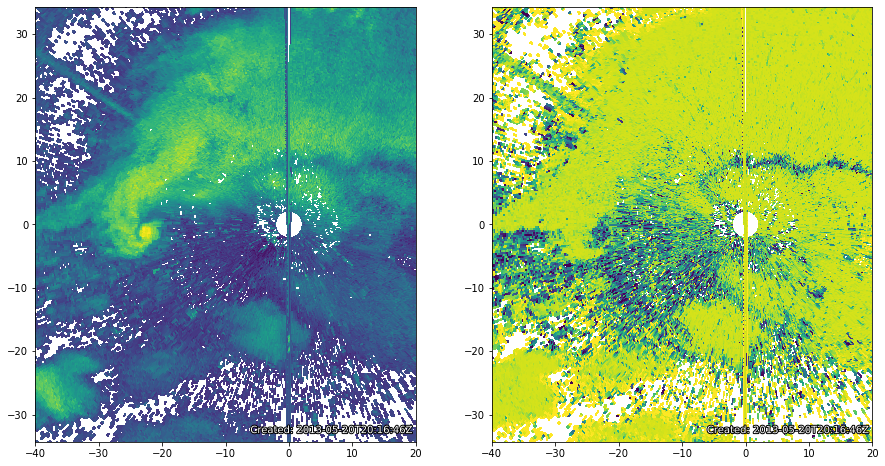

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8)) # 1,2 แสดงว่าภาพนี้มี 1 แถว 2 คอลัมน์ นั่นคือ ภาพซ้ายเป็นค่าการสะท้อน ภาพขวาเป็น CC
#add_metpy_logo(fig, 190, 85, size='large')
for var_data, var_range, ax in zip((ref, rho), (ref_range, rho_range), axes):
    # ทำการจัดเก็บข้อมูลในอาเรย์และทำการ mask ข้อมูลที่ไม่มีการ return มา
    data = np.ma.array(var_data)
    data[np.isnan(data)] = np.ma.masked

    # แปลงค่ามุมอซิมุทเป็นพิกัด x,y
    xlocs = var_range * np.sin(np.deg2rad(az[:, np.newaxis]))
    ylocs = var_range * np.cos(np.deg2rad(az[:, np.newaxis]))

    # พลอตข้อมูลในรูปแบบแผนที่
    ax.pcolormesh(xlocs, ylocs, data, cmap='viridis')
    ax.set_aspect('equal', 'datalim')
    ax.set_xlim(-40, 20) # ตรงนี้เซตค่าในการแสดงภาพ ในแนวแกน x
    ax.set_ylim(-30, 30)# ตรงนี้เซตค่าในการแสดงภาพ ในแนวแกน y
    add_timestamp(ax, f.dt, y=0.02, high_contrast=True)

plt.show()

## แบบฝึกหัด
* ให้นิสิตทำการดาวน์โหลดข้อมูล nexrad level 2 นามสกุล *.gz จากเวป https://www.ncdc.noaa.gov/nexradinv/choosesite.jsp โดยทำการดาวน์โหลดสถานี KTLX ซึ่งเป็นสถานี Oklahoma ศึกษา https://www.mesonet.org/index.php/weather/radar/KTLX  ให้ใช้ข้อมูลวันเวลาจากลิงก์ต่อไปนี้ https://www.weather.gov/oun/tornadodata-ok-2021 เพื่อทำการดาวน์โหลดข้อมูลมา 1 ช่วงเวลา  โดยให้ทำการดาวน์โหลด Level-II (base data) เพื่อทำการพลอตข้อมูล